#### Case 3.a

This is the case solved by Xue & Leibler.

Again, the environment is constant ($\epsilon(t)=A$) and selection is extreme ($\omega_A = 1, \omega_B=0$).

However, we now start from an isogenic population with $\pi_0$, that is 
$$
f_0(\pi) = \left\{\begin{matrix}
1 & \pi=\pi_0\\ 
0 & else
\end{matrix}\right.
$$

Now, since individuals that have phenotype $\phi_B$ do not produce offspring, the population at time $t$ belong to a lineage of exactly $t$ $\phi_A$ phenotypes all with the same $\hat{\pi}_t$:

$$
f_t(\pi) = \left\{\begin{matrix}
1 & \pi=\hat{\pi}_t\\ 
0 & else
\end{matrix}\right.
$$

To find $\hat{\pi}_t$, we need to solve:
$$
\hat{\pi}_0 = \pi_0 \\
\hat{\pi}_{t+1} = \hat{\pi}(1-\eta) + \eta
$$

the solution is (eq. 2 in Xue2016; easy to check with induction):
$$
\hat{\pi} = 1 - (1-\pi_0)(1-\eta)^t 
$$

Therefore the dynamics are entirely described by:
$$
f_t(\pi) = \left\{\begin{matrix}
1 & \pi= 1 - (1-\pi_0)(1-\eta)^t \\ 
0 & else
\end{matrix}\right.
$$

In agreement with _case 3_, 
$$
\lim_{t \to \infty} f_t(\pi) = \left\{\begin{matrix}
1 & \pi=1\\ 
0 & else
\end{matrix}\right.
$$


This is somewhat of a degenerative case: because there hard selection against phenotype $\phi_B$ the population always remains isogenic, and there is no selection on the trait - just removal of individuals that happen to be of phenotype $\phi_B$. However, this not _natural selection_ per se, as natural selection acts on _genetic variation_.

#### Case 3.b.

Continue from _Case 3.a._ 

First, note that we saw that if the environment is constantly $A$ then after $t$ generations the entire population has trait $\hat{\pi}_t = 1-(1-\pi_0)(1-\eta)^t$. However, if the environment was actually constantly $B$, then we would have $\hat{\pi}_t = \pi_0 (1-\eta)^t$ (Eq. 2 in Xue2016).

We define 
$$
g(x, t) = 1 - (1-x)(1-\eta)^t \\
h(x, t) = x (1-\eta)^t
$$

Suppose the dynamics started at time $t=0$ with and isogenic population with $\pi_0$. 
Assume that $n=2k$ environmental changes occur with intervals between them of $t_1, t_2, ..., t_{n-1}$ and $t_0$ is the time for first environmental change (denote $T_k=\sum_0^k{t_k}$):

$$
\pi_{T_0} = g(\pi_0, t_0) \\
\pi_{T_1} = h(\pi_{t_0}, t_1) \\
...\\
\pi_{T_{n-2}} = g(\pi_{t_{n-3}}, t_{n-2}) \\
\pi_{T_{n-1}} = h(\pi_{t_{n-2}}, t_{n-1})
$$

In [74]:
# import sympy
# sympy.init_printing()

In [75]:
# x, η, t = sympy.symbols('x η t')

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    style='white',
    font_scale=1.3
)

In [19]:
def g(x, t):
    return 1 - (1 - x) * (1 - η)**t
def h(x, t):
    return x * (1 - η)**t

In [54]:
import numpy as np

In [98]:
t1 = 1
t2 = 1
η = 0.1
π0 = 0.5
n = 100

def simulation(t1, t2):
    t = [0]
    π = [π0]
    i = 1

    while sum(t) < n:
        t.append( np.random.geometric(1/t1) )
        π.append( g(π[-1], t[-1]) )
        t.append( np.random.geometric(1/t1) )
        π.append( h(π[-1], t[-1]) )        
    return t, π

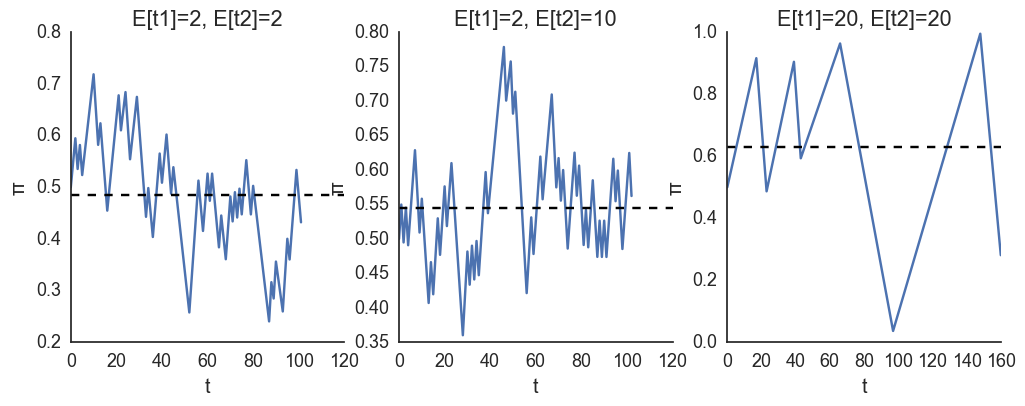

In [100]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharex=False, sharey=False)
t1t2 = ((2,2), (2,10), (20,20))
tπ = (simulation(*t) for t in t1t2)

for (t, π), (t1,t2), ax in zip(tπ, t1t2, axes):
    ax.plot(np.cumsum(t), π, '-')
    ax.axhline(np.mean(π), color='k', ls='--')
    ax.set(
        title='E[t1]={}, E[t2]={}'.format(t1, t2),
        xlabel='t',
        ylabel='π',
    )
sns.despine()